In [11]:
pip install scikit-learn


     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     -------------------------------- ----- 51.2/60.6 kB 525.1 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 461.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.9 MB 9.9 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/10.9 MB 21.0 MB/s eta 0:00:01
   ------ --------------------------------- 1.7/10.9 MB 15.1 MB/s eta 0:00:01
   --------- ------------------------------ 2.5/10.9 MB 16.1 MB/s eta 0:00:01
   ------------ --------------------------- 3.4/10.9 MB 18.0 MB/s eta 0:00:01
   ------------ --------------------------- 3.5/10.9 MB 16.2 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/10.9 MB 14.0 MB/s eta 0:00:01
   ----

In [17]:
pip install openpyxl

   ---------------------------------------- 0.0/251.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/251.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/251.3 kB ? eta -:--:--
   ------ -------------------------------- 41.0/251.3 kB 487.6 kB/s eta 0:00:01
   ----------------------------------- ---- 225.3/251.3 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 251.3/251.3 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Load the dataset
file_path = 'C:/Users/mhatr/OneDrive/Desktop/python lab course/Jitesh Project/MGT001437_ProjectC/data.xlsx'  # Replace this with the correct file path
data = pd.read_excel(file_path)

# Set appropriate column names using the second row and remove the first two rows
data.columns = data.iloc[1]
data = data.drop([0, 1])

# Reset the index and remove columns that are completely empty or unnamed
data = data.reset_index(drop=True)
data.columns = data.columns.str.strip()
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# Identify columns that should be numeric
numeric_columns = [
    'Carbon content (wt%)', 'Hydrogen content (wt%)', 'Nitrogen content (wt%)',
    'Oxygen content (wt%)', 'Sulfur content (wt%)', 'Volatile matter (wt%)',
    'Fixed carbon (wt%)', 'Ash content (wt%)', 'Reaction temperature (°C)',
    'Microwave power (W)', 'Reaction time (min)', 'Microwave absorber percentage (%)',
    'Dielectric constant of absorber (ε′)', 'Dielectric loss factor of absorber (ε“)',
    'Bio-oil yield (%)', 'Syngas yield (%)', 'Syngas composition (H₂, mol%)',
    'Syngas composition (CH₄, mol%)', 'Syngas composition (CO₂, mol%)',
    'Syngas composition (CO, mol%)', 'Biochar yield (%)', 'Biochar calorific value (MJ/kg)',
    'Biochar H/C ratio (-)', 'Biochar H/N ratio (-)', 'Biochar O/C ratio (-)'
]

# Convert identified columns to numeric, coercing errors
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Separate numeric and non-numeric data
numeric_data = data[numeric_columns]
non_numeric_data = data.drop(columns=numeric_columns)

# Debugging: Print the structure of numeric_data
print("Numeric data columns:", numeric_data.columns)
print("Numeric data head:\n", numeric_data.head())
print("Non-numeric data columns:", non_numeric_data.columns)
print("Non-numeric data head:\n", non_numeric_data.head())

# Check if numeric_data is empty
if numeric_data.empty:
    raise ValueError("No numeric columns found in the dataset to impute.")

# Initialize the IterativeImputer
imputer = IterativeImputer(random_state=0)

# Impute missing values in the numeric data
imputed_data = imputer.fit_transform(numeric_data)

# Convert the imputed numpy array back to a DataFrame with appropriate column names
imputed_df = pd.DataFrame(imputed_data, columns=numeric_data.columns)

# Concatenate the imputed numeric data with the non-numeric columns
final_data = pd.concat([non_numeric_data.reset_index(drop=True), imputed_df.reset_index(drop=True)], axis=1)

# Display the first few rows of the final cleaned and imputed dataset
print(final_data.head())

# Save the cleaned and imputed dataset to a new Excel file
final_data.to_excel('cleaned_imputed_data.xlsx', index=False)


Numeric data columns: Index(['Carbon content (wt%)', 'Hydrogen content (wt%)',
       'Nitrogen content (wt%)', 'Oxygen content (wt%)',
       'Sulfur content (wt%)', 'Volatile matter (wt%)', 'Fixed carbon (wt%)',
       'Ash content (wt%)', 'Reaction temperature (°C)', 'Microwave power (W)',
       'Reaction time (min)', 'Microwave absorber percentage (%)',
       'Dielectric constant of absorber (ε′)',
       'Dielectric loss factor of absorber (ε“)', 'Bio-oil yield (%)',
       'Syngas yield (%)', 'Syngas composition (H₂, mol%)',
       'Syngas composition (CH₄, mol%)', 'Syngas composition (CO₂, mol%)',
       'Syngas composition (CO, mol%)', 'Biochar yield (%)',
       'Biochar calorific value (MJ/kg)', 'Biochar H/C ratio (-)',
       'Biochar H/N ratio (-)', 'Biochar O/C ratio (-)'],
      dtype='object', name=1)
Numeric data head:
 1  Carbon content (wt%)  Hydrogen content (wt%)  Nitrogen content (wt%)  \
0                 33.14                    5.58                    4.85   


In [25]:
# Save the cleaned and imputed dataset to a new Excel file
final_data.to_excel('cleaned_imputed_data.xlsx', index=False)


In [26]:
# Save the cleaned and imputed dataset to a new CSV file
final_data.to_csv('cleaned_imputed_data.csv', index=False)


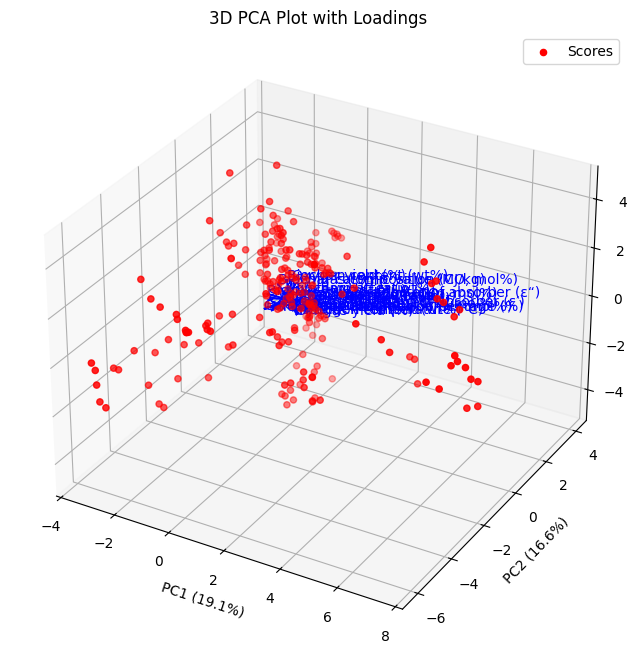

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Load your dataset
df = pd.read_excel('C:/Users/mhatr/OneDrive/Desktop/python lab course/Jitesh Project/cleaned_imputed_data.xlsx')

# Remove all columns that are strings
data = df.select_dtypes(include=[np.number])

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Plot the 3D PCA results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c='r', marker='o', label='Scores')

# Plot the loadings (arrows)
for i, (x, y, z) in enumerate(loadings):
    ax.quiver(0, 0, 0, x, y, z, color='b', arrow_length_ratio=0.1)
    ax.text(x, y, z, data.columns[i], color='b')

ax.set_title('3D PCA Plot with Loadings')
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0] * 100:.1f}%)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1] * 100:.1f}%)')
ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2] * 100:.1f}%)')

# Plot 95% confidence ellipse (optional, needs further calculation)
# This is a simplified version and may not match exactly
# from matplotlib.patches import Ellipse
# angle = np.arctan2(pca_df['PC2'], pca_df['PC1'])
# width = 2 * np.sqrt(pca.explained_variance_ratio_[0])
# height = 2 * np.sqrt(pca.explained_variance_ratio_[1])
# ell = Ellipse(xy=(np.mean(pca_df['PC1']), np.mean(pca_df['PC2'])),
#               width=width, height=height,
#               edgecolor='r', fc='None', lw=2, label='95% Confidence Ellipse')
# ax.add_patch(ell)

ax.legend()
plt.show()
